In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = [13,5]

In [3]:
# ---------------------------------------------------------------
# Load Data
# ---------------------------------------------------------------
input_dir = "./data/"

train_file = os.path.join(input_dir, "train.csv")
test_file = os.path.join(input_dir, "test.csv")

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

X = train.iloc[:,:-1]
y = train.iloc[:,-1]


# ---------------------------------------------------------------
# Map features
# ---------------------------------------------------------------
# Map categorical variables with one-hot encoding
X_transformed = pd.get_dummies(X)
print(X_transformed.shape)

# Drop NAs (because regression tree can't handle NAs)
X_transformed.dropna(axis=1, how='any', inplace=True)
print(X_transformed.shape)


# ---------------------------------------------------------------
# Split to train and test set
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2)

print("feature:", X_train.shape[1])
print("num train samples:", X_train.shape[0])
print("num valid samples:", X_test.shape[0])

(1460, 289)
(1460, 286)
feature: 286
num train samples: 1168
num valid samples: 292


## Bagging

[`sklearn.ensemble.BaggingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

> A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.


In [4]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(n_estimators = 30, random_state=1)
clf = clf.fit(X_train, y_train)

**Evaluation**

In [5]:
import sklearn.metrics
sklearn.metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

0.010273972602739725

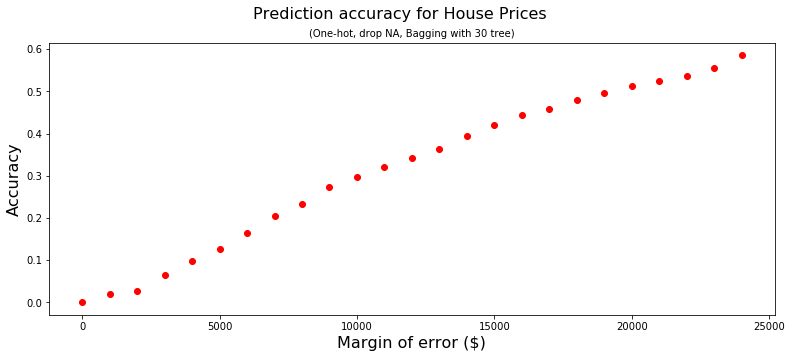

In [6]:
def evaluation(margin = 5000):
    def _eval(m):
        y_hat = clf.predict(X_test)
        answer_within_range = (y_test+m > y_hat) & (y_hat > y_test-m)
        return(sum(answer_within_range) / len(answer_within_range))
    
    if type(margin) in [list, range]:
        return([_eval(m) for m in margin])
    else:
        return(_eval(margin))
    
    
margins = range(0, 25000, 1000)

plt.plot(margins, evaluation(margins), 'ro')
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Margin of error ($)', fontsize=16)
plt.suptitle('Prediction accuracy for House Prices', fontsize=16)
plt.title('(One-hot, drop NA, Bagging with 30 tree)', fontsize=10)

In [7]:
# Accuracy at margin of error at 5K
evaluation(5000)

0.12671232876712329

**Different number of trees**

In [10]:
n_trees = [10, 30, 50, 100]
margins = range(0, 25000, 1000)

evals = {}

for n in n_trees:
    clf = BaggingClassifier(n_estimators = n, random_state=1)
    clf = clf.fit(X_train, y_train)
    
    evals[n] = evaluation(margins)

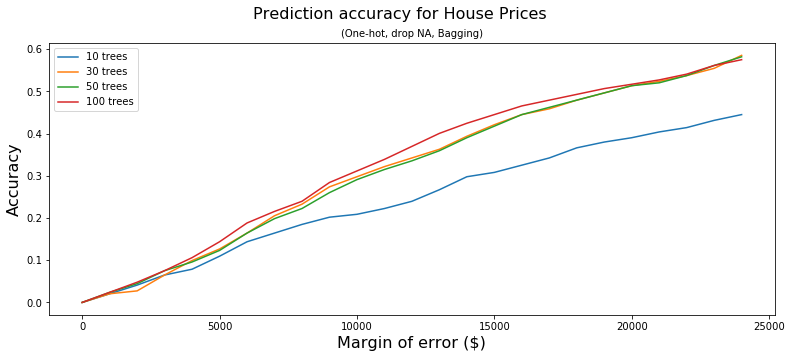

In [11]:
x1 = plt.plot(margins, evals[10], label="10 trees")
x2 = plt.plot(margins, evals[30], label="30 trees")
x3 = plt.plot(margins, evals[50], label="50 trees")
x4 = plt.plot(margins, evals[100], label="100 trees")

plt.legend(loc='upper left')

plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Margin of error ($)', fontsize=16)
plt.suptitle('Prediction accuracy for House Prices', fontsize=16)
plt.title('(One-hot, drop NA, Bagging)', fontsize=10)

More trees higher accuracy